# 📊 Malaysia Vehicle Registration Analysis

This notebook will study the trend and data about cars registered in Malaysia from 2010 until August 2025.
<br>I excluded the data prior to 2010 to see a more latest trend, even though the data contains from year 2000.

The *[data source](https://data.gov.my/data-catalogue/registration_transactions_car)* is officially from the Department of Statistics Malaysia (DOSM) which contains the actual transactional records of all cars registered with the Road Transport Department (JPJ) since 2000, excluding any personal identifiable data. 
<br>The dataset captures the registration of cars, not the sale or import or any other transaction.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Ensure plots look good
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14


## 📂 Importing the data

Since the data source is from CSV link, we can loop through the link to get multiple years of data.

In [83]:
# Modify the year to get different range
year_from = 2010 
year_to = 2025
dfs = []

for year in range(year_from, year_to + 1):
    url = f"https://storage.data.gov.my/transportation/cars_{year}.csv"
    df_year = pd.read_csv(url)
    df_year["year"] = year
    dfs.append(df_year)

df = pd.concat(dfs, ignore_index=True)

🔍 Preview the data:

In [86]:
df.head()

,date_reg,type,maker,model,colour,fuel,state,year
0,2010-01-01,motokar_pelbagai_utiliti,Chery,B14,gold,petrol,Johor,2010
1,2010-01-01,motokar,Honda,Accord,white,petrol,Johor,2010
2,2010-01-01,motokar,Honda,Accord,black,petrol,Johor,2010
3,2010-01-01,motokar,Honda,Accord,black,petrol,Johor,2010
4,2010-01-01,motokar,Honda,Accord,silver,petrol,Johor,2010


## ℹ️ Info check 

To verify that our data contains the intended year, we can check unique values in **year** column.

In [85]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025])

Check the data types, missing and unique values.

> Findings:
> - The data from 2010 to 2025 contains 10,326,481 rows
> - There are no missing values, so we can immediately use the data
> - The unique count is consistent within the intended data
> <br>
<br>

In [87]:
print('Check data info:')
df.info()

print('\nMissing values:')
print(df.isnull().sum())

print('\nQuick unique count per column:')
print(df.nunique())

Check data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326481 entries, 0 to 10326480
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date_reg  object
 1   type      object
 2   maker     object
 3   model     object
 4   colour    object
 5   fuel      object
 6   state     object
 7   year      int64 
dtypes: int64(1), object(7)
memory usage: 630.3+ MB

Missing values:
date_reg    0
type        0
maker       0
model       0
colour      0
fuel        0
state       0
year        0
dtype: int64

Quick unique count per column:
date_reg    5414
type           6
maker        164
model       1312
colour        16
fuel          15
state         17
year          16
dtype: int64


Basic descriptive stats

In [88]:
df.describe(include="all")

,date_reg,type,maker,model,colour,fuel,state,year
count,10326481,10326481,10326481,10326481,10326481,10326481,10326481,1.032648e+07
unique,5414,6,164,1312,16,15,17,NaN
top,2025-02-28,motokar,Perodua,Myvi,white,petrol,Rakan Niaga,NaN
freq,14838,6796855,3654880,1156583,2749282,9238330,5975680,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017681e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.669077e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.010000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022000e+03


## 📈 Analysis and Visualizations

### 🚗 Number of Vehicle Registration by Year

Car registrations skyrocketed by ~40%  from 2021 until 2022, likely due to MCO restrictions has been lifted which cleared backlogs of slow supply chain during the MCO thus increasing the registration numbers.

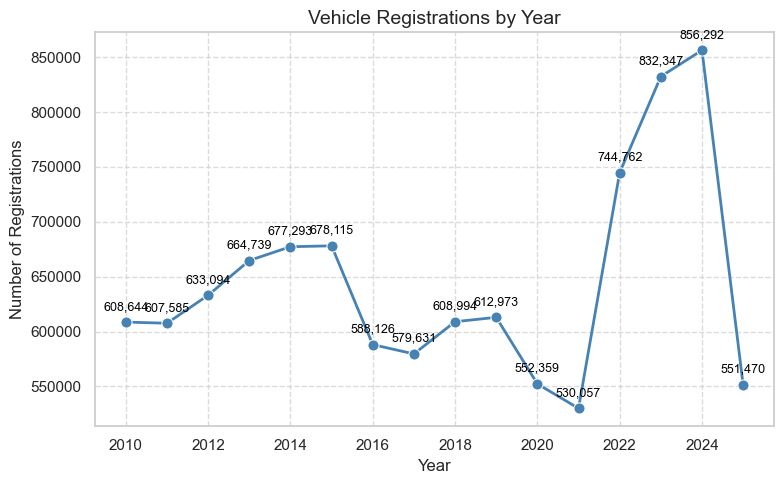

In [89]:
# Group by year
yearly_counts = df.groupby("year").size().reset_index(name="registrations")

# Plot line chart with markers
plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=yearly_counts,
    x="year",
    y="registrations",
    marker="o",        # bullet points
    linewidth=2,
    markersize=8,
    color="steelblue"
)

# Add data labels on each point
for i, row in yearly_counts.iterrows():
    ax.text(
        row["year"], row["registrations"] + (0.01 * yearly_counts["registrations"].max()), 
        f"{row['registrations']:,}", 
        ha="center", va="bottom", fontsize=9, color="black"
    )

# Titles and labels
plt.title("Vehicle Registrations by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### 🚗 Top 10 Car Brands

Perodua maintains as the top car brand chosen by Malaysians. This is apparent since 4 of the Top 5 Models are from Perodua.

Proton as another local brand takes the 2nd spot and subsequently Japanese car brands of Toyota, Honda and Nissan follows the lead.

> Observation:
> - Malaysians prefer local cars, could be due to low prices compared to others.
> - For Japanese brand, Malaysians prefer Toyota likely because of the reliability.  
> <br>

<br>

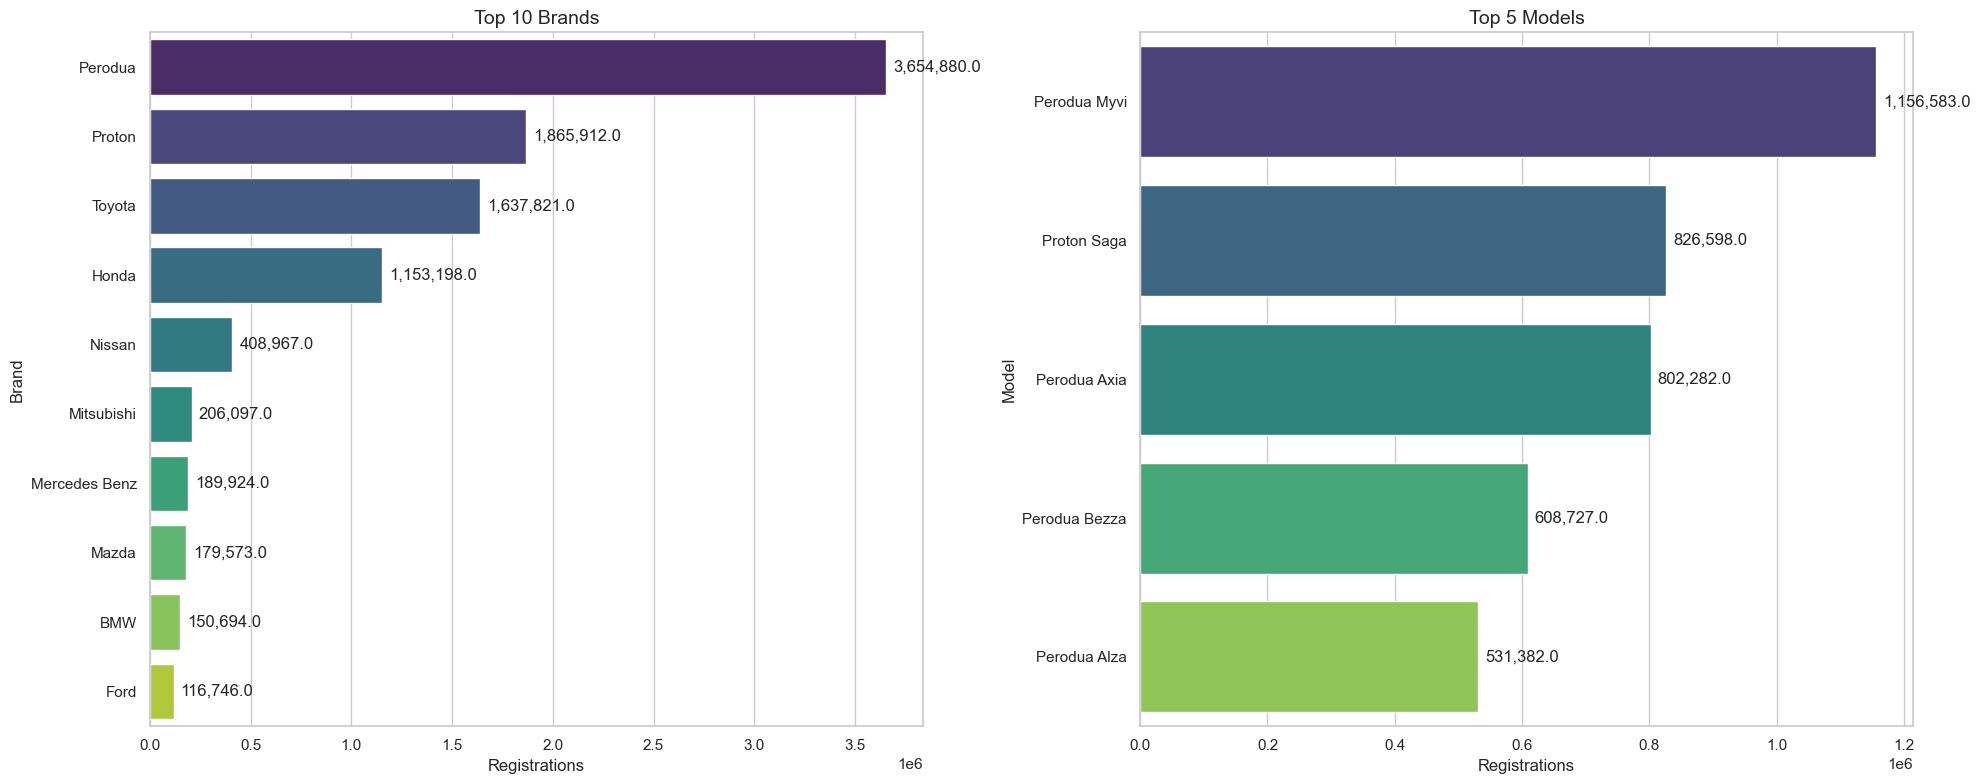

In [100]:
# Create a combined column
df["maker_model"] = df["maker"] + " " + df["model"]

# Top 10 makers
top_makers = df["maker"].value_counts().nlargest(10).reset_index()
top_makers.columns = ["maker", "count"]

# Top 10 combined maker-models
top_maker_models = df["maker_model"].value_counts().nlargest(5).reset_index()
top_maker_models.columns = ["maker_model", "count"]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Top 10 makers
sns.barplot(data=top_makers, x="count", y="maker", hue="maker", legend=False, palette="viridis", ax=axes[0])
axes[0].set_title("Top 10 Brands")
axes[0].set_xlabel("Registrations")
axes[0].set_ylabel("Brand")
for p in axes[0].patches:
    axes[0].annotate(format(p.get_width(), ","),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha="left", va="center", xytext=(5, 0), textcoords="offset points")

# Plot 2: Top 5 maker-model combinations
sns.barplot(data=top_maker_models, x="count", y="maker_model", hue="maker_model", legend=False, palette="viridis", ax=axes[1])
axes[1].set_title("Top 5 Models")
axes[1].set_xlabel("Registrations")
axes[1].set_ylabel("Model")
for p in axes[1].patches:
    axes[1].annotate(format(p.get_width(), ","),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha="left", va="center", xytext=(5, 0), textcoords="offset points")

plt.tight_layout()
plt.show()


### 🚙 Type of Vehicles

Majority of Malaysians drive motokar, followed by jip and SUV.

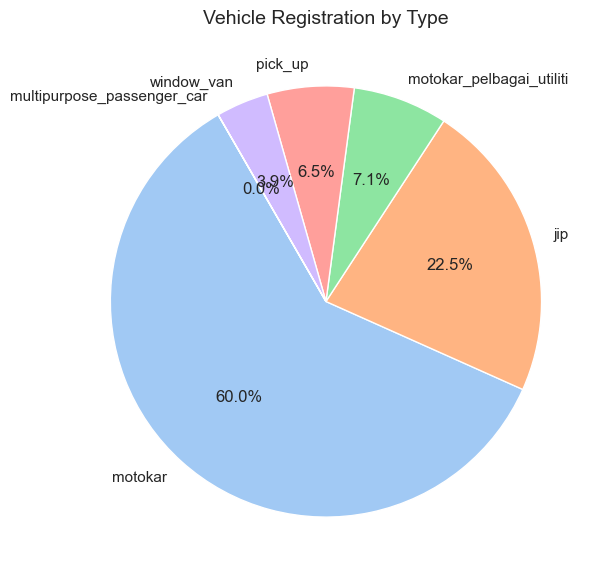

In [59]:
type_counts = df["type"].value_counts().reset_index()
type_counts.columns = ["type", "count"]

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(type_counts["count"], labels=type_counts["type"],
        autopct="%1.1f%%", startangle=120, colors=sns.color_palette("pastel"))

plt.title("Vehicle Registration by Type")
plt.show()

### ⚡ Trend of Hybrid VS Electric vehicles

In 2025, electric vehicle registrations overtake the hybrid type vehicle as the demand of hybrid plunges after 4 years of incline.

> Observation
> - From 2021 the demand for electric and hybrid increases together.
> - In 2025, hybrid demand drops while electric vehicle keeps increasing
> - Due to increase of charging infrastructure in Malaysia, it is not surprising to see the rise of electric vehicles
> <br>
<br>

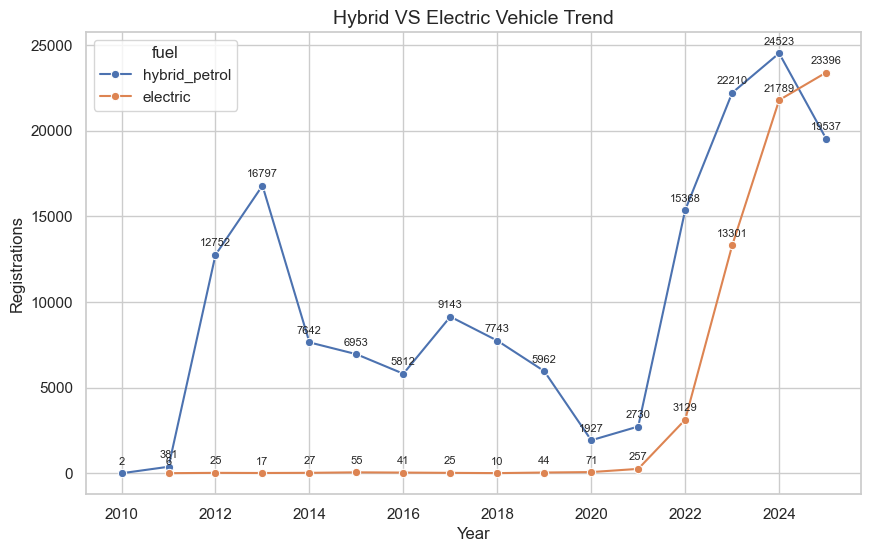

In [102]:
# Keep only Petrol, Electric, and Hybrid_Petrol
filtered_fuels = ["electric", "hybrid_petrol"]
df_filtered = df[df["fuel"].isin(filtered_fuels)]

fuel_trend = df_filtered.groupby(["year", "fuel"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=fuel_trend, x="year", y="count", hue="fuel", marker="o")

# Add labels on each point
for _, row in fuel_trend.iterrows():
    plt.text(row["year"], row["count"] + 500, str(row["count"]), 
             ha="center", fontsize=8)

plt.title("Hybrid VS Electric Vehicle Trend")
plt.xlabel("Year")
plt.ylabel("Registrations")
plt.show()

### 🗺️ Regional Analysis By State

Rakan Niaga has the most registered vehicles.

Rakan Niaga is defined as either indicates the state of the JPJ office the car was registered at, or that the car was registered through an official JPJ partner portal ('Rakan Niaga').

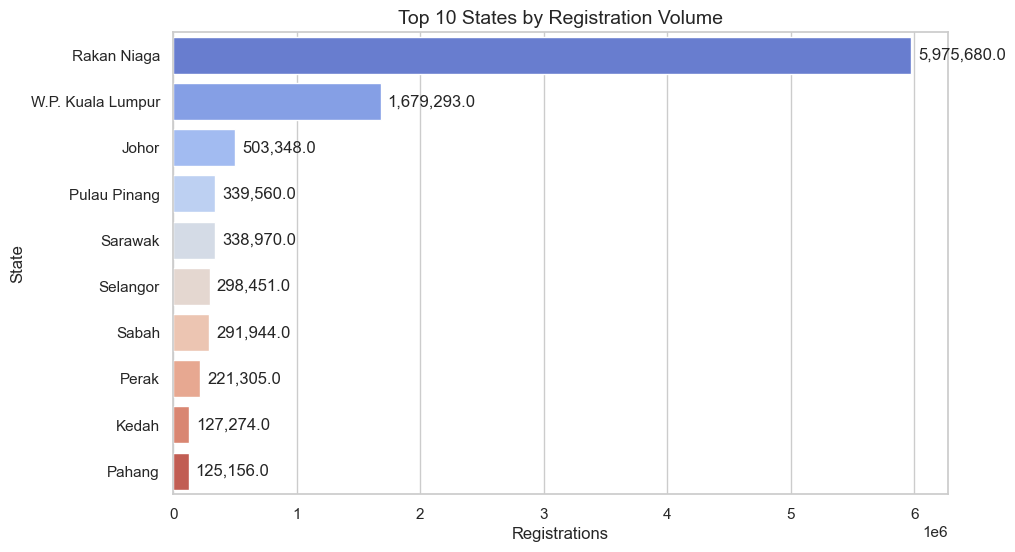

In [104]:
state_counts = df["state"].value_counts().nlargest(10).reset_index()
state_counts.columns = ["state", "count"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=state_counts, x="count", y="state", hue="state", palette="coolwarm")

for p in ax.patches:
    ax.annotate(format(p.get_width(), ","),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha="left", va="center", xytext=(5, 0), textcoords="offset points")

plt.title("Top 10 States by Registration Volume")
plt.xlabel("Registrations")
plt.ylabel("State")
plt.show()

If we exclude Rakan Niaga, WP Kuala Lumpur has the highest registrations followed by Johor and Selangor.

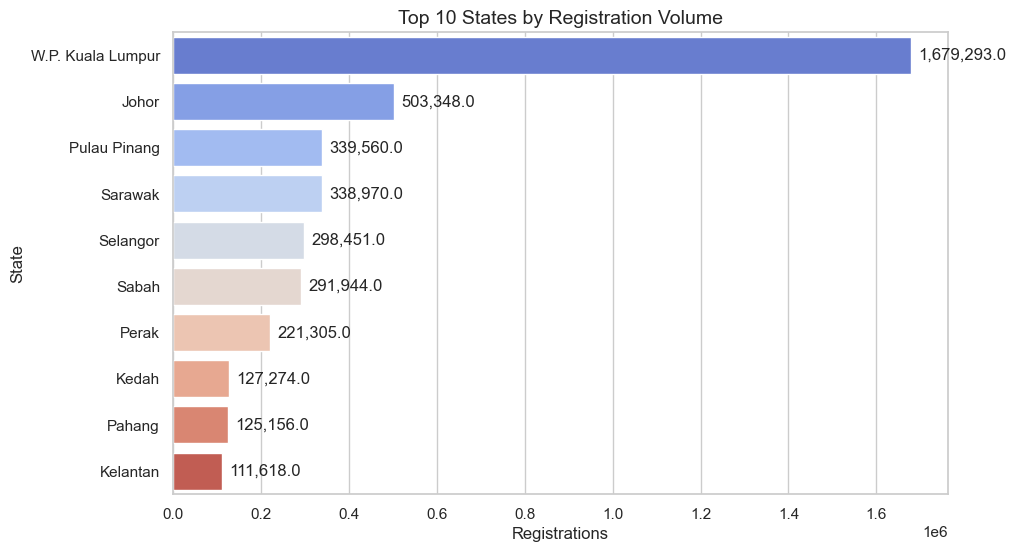

In [105]:
df_filtered = df[df["state"] != "Rakan Niaga"]

state_counts = df_filtered["state"].value_counts().nlargest(10).reset_index()
state_counts.columns = ["state", "count"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=state_counts, x="count", y="state", hue="state", palette="coolwarm")

for p in ax.patches:
    ax.annotate(format(p.get_width(), ","),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha="left", va="center", xytext=(5, 0), textcoords="offset points")

plt.title("Top 10 States by Registration Volume")
plt.xlabel("Registrations")
plt.ylabel("State")
plt.show()

### 🎨 Common Car Colours

White colours are the most top picked while maroon is the least picked colour.

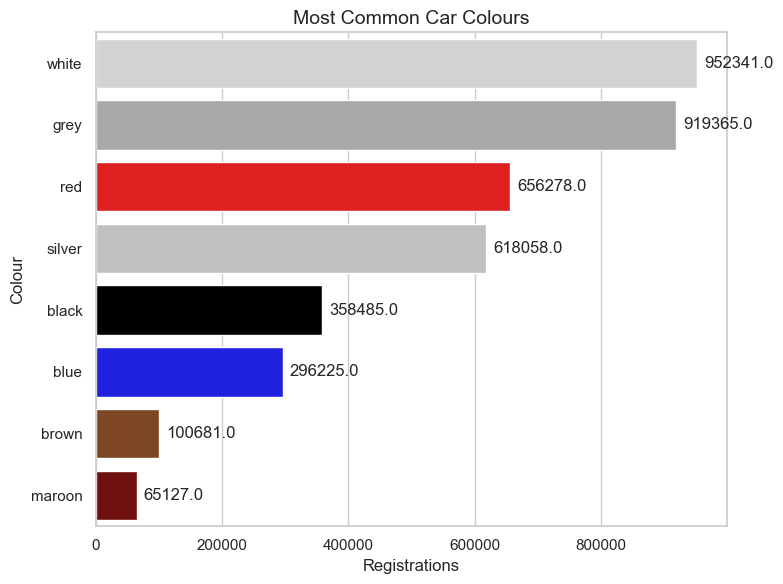

In [82]:
# Prepare colour counts
colour_counts = df["colour"].value_counts().nlargest(8).reset_index()
colour_counts.columns = ["colour", "count"]

# Custom palette mapping
custom_palette = {
    "white": "lightgrey",
    "grey": "darkgrey",
    "red": "red",
    "silver": "silver",
    "black": "black",
    "blue": "blue",
    "brown": "saddlebrown",   # more realistic brown shade
    "maroon": "maroon",
}

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=colour_counts,
    x="count",
    y="colour",
    hue="colour",                # map hue to colour column
    palette=custom_palette,      # apply our custom mapping
    dodge=False,
    legend=False
)

# Add data labels
for p in ax.patches:
    ax.annotate(
        str(p.get_width()),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha="left", va="center", xytext=(5, 0), textcoords="offset points"
    )

plt.title("Most Common Car Colours")
plt.xlabel("Registrations")
plt.ylabel("Colour")
plt.tight_layout()
plt.show()